## Importing Libraries

In [115]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

## Loading dataset

In [116]:
df = pd.read_csv('heart.csv')
df.shape

(1025, 14)

In [117]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
343,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
352,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
356,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
747,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


## Feature Engineering

### Statistical analysis

In [118]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Checking for null values

In [119]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [120]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

### Plotting no. of cases(+ve and -ve) vs features  

In [121]:
df_p = df[df['target']==1]
df_n = df[df['target']==0]

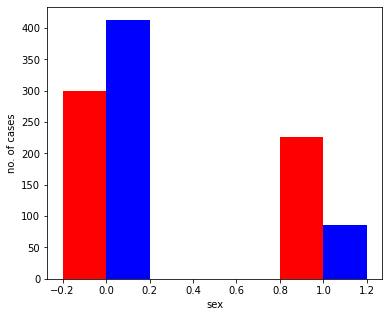

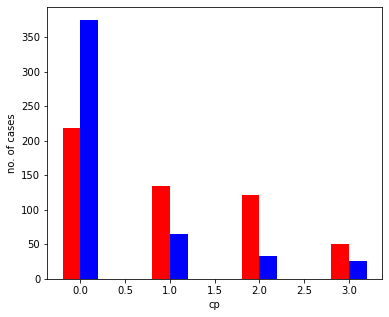

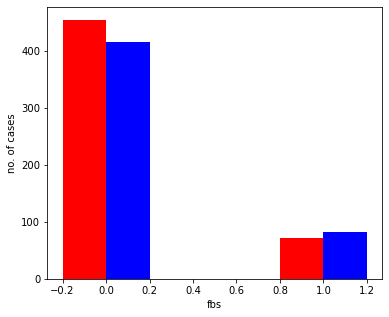

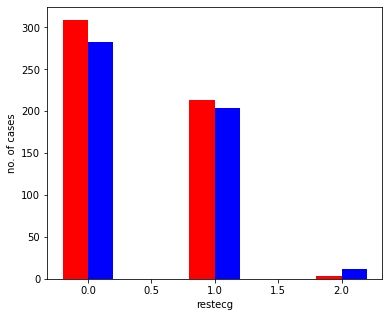

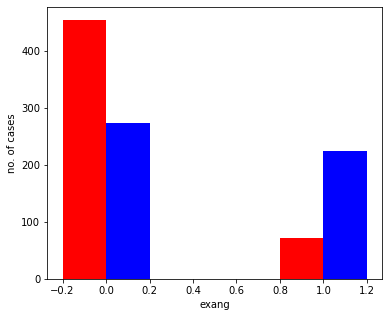

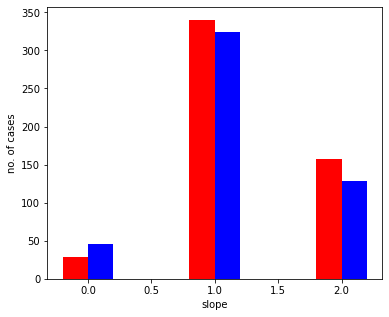

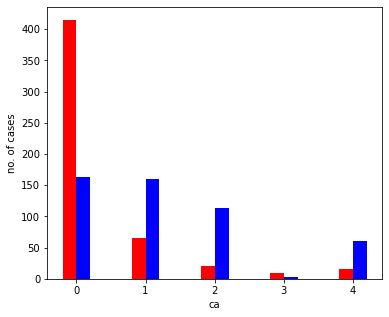

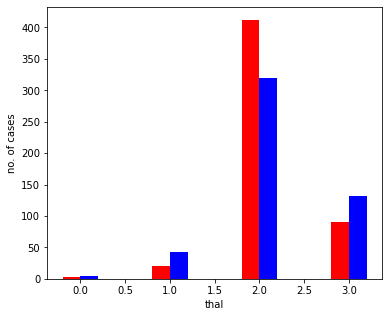

In [122]:
cat_features = np.array(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
for features in cat_features:
    x = np.array((df_p[features].unique()))
    y1 = np.array(df_p[features].value_counts())
    y2 = np.array(df_n[features].value_counts())
    plt.figure(figsize=(6,5))
    plt.bar(x-0.1,y1,width=0.2,color='red')
    plt.bar(x+0.1,y2,width=0.2,color='blue')
    plt.xlabel(features)
    plt.ylabel('no. of cases')

### Handling categorical features

In [123]:
df = pd.get_dummies(df, columns = cat_features)

In [124]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0


In [125]:
df.shape

(1025, 31)

## Feature selection

<AxesSubplot:>

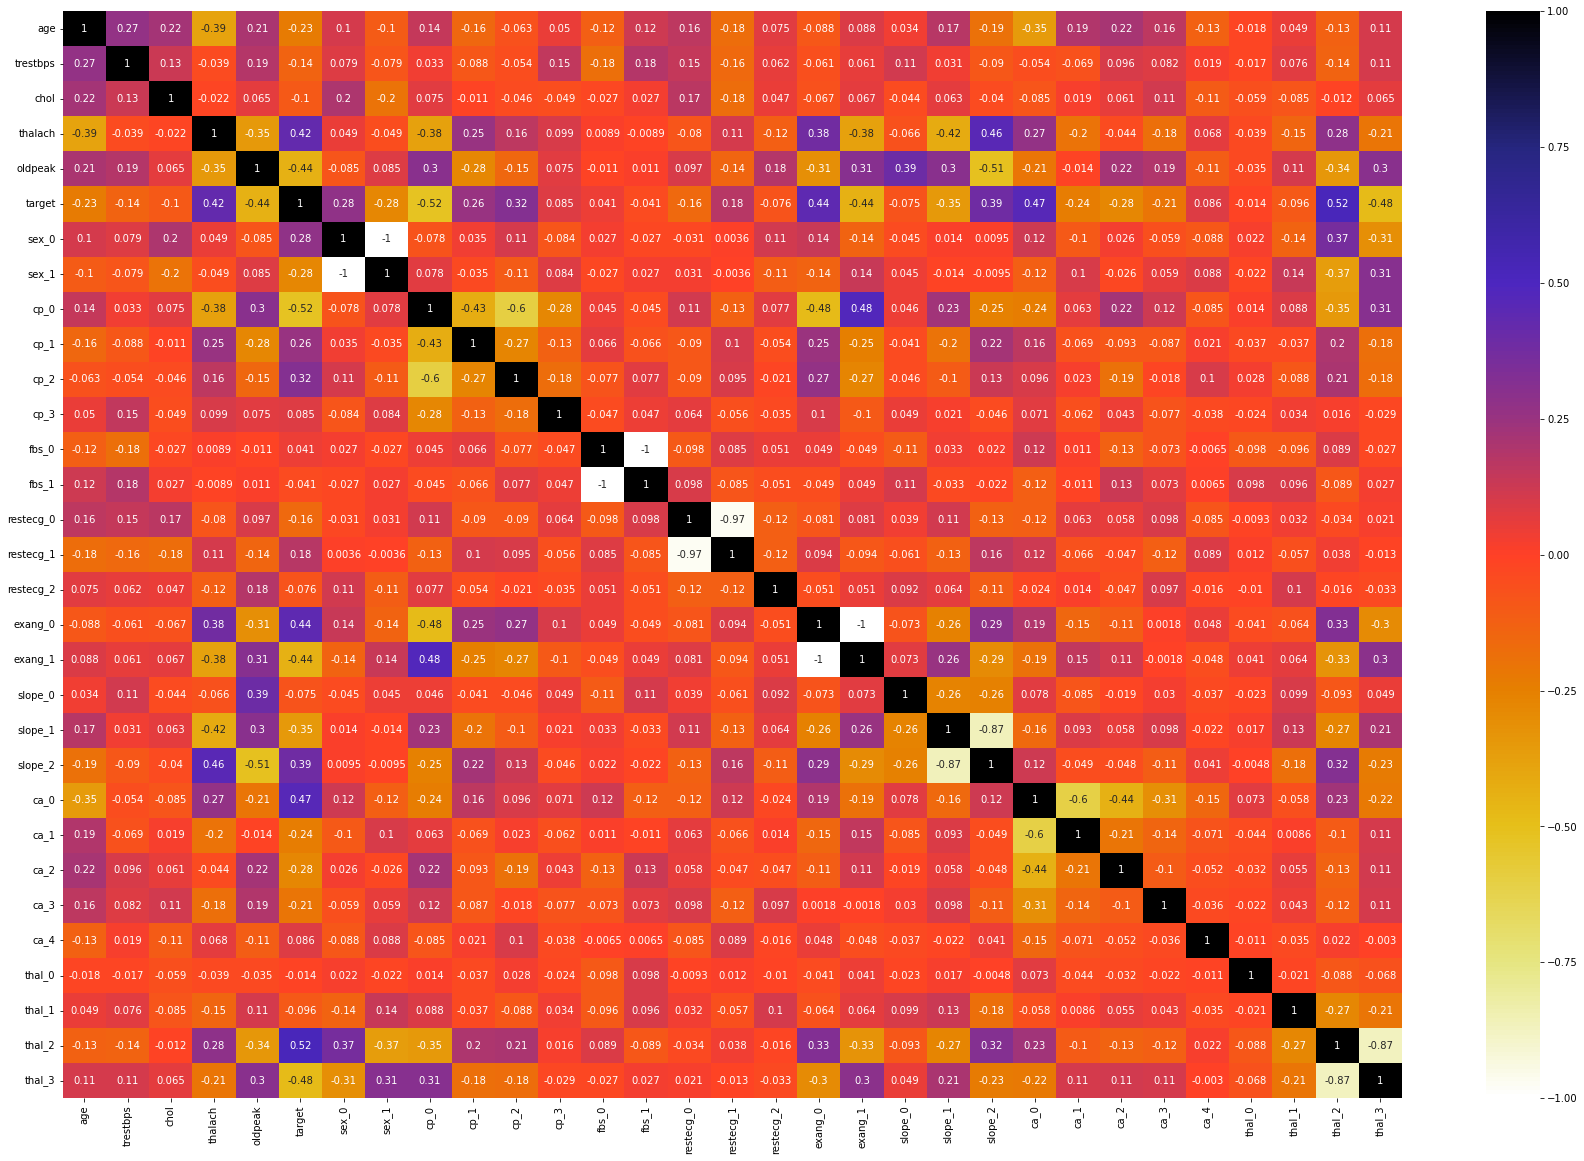

In [126]:
plt.figure(figsize=(30,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)

### Removing highly correlated features

In [127]:
corr = df.corr()
columns = set()
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if abs(corr.iloc[i,j]) >= 0.85:
            columns.add(corr.columns[i])

In [128]:
for i in columns:
    df = df.drop(i,axis=1)

In [129]:
df.shape

(1025, 25)

## Modelling


In [130]:
X = df.drop('target',axis=1)
Y = df['target']

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=80)

### RandomForest

In [132]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [133]:
Y_pred = rf.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,Y_pred)))
print("Classification report: \n {}".format(classification_report(Y_test,Y_pred)))

[[148   0]
 [  0 160]]
Accuracy Score 1.0
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       160

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



### KNN

In [134]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [135]:
Y_pred = knn.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,Y_pred)))
print("Classification report: \n {}".format(classification_report(Y_test,Y_pred)))

[[116  32]
 [ 54 106]]
Accuracy Score 0.7207792207792207
Classification report: 
               precision    recall  f1-score   support

           0       0.68      0.78      0.73       148
           1       0.77      0.66      0.71       160

    accuracy                           0.72       308
   macro avg       0.73      0.72      0.72       308
weighted avg       0.73      0.72      0.72       308



### Hyperparameter Tuning

In [136]:
grid_params = {'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [137]:
knn = RandomizedSearchCV(knn, grid_params,n_iter=100, cv=2, n_jobs = -1)
knn.fit(X_train, Y_train)

RandomizedSearchCV(cv=2, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']})

In [138]:
knn.best_params_

{'weights': 'distance', 'n_neighbors': 9, 'metric': 'manhattan'}

In [139]:
Y_pred=knn.best_estimator_.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,Y_pred)))
print("Classification report: \n {}".format(classification_report(Y_test,Y_pred)))

[[148   0]
 [  9 151]]
Accuracy Score 0.9707792207792207
Classification report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       148
           1       1.00      0.94      0.97       160

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



## SVM

In [146]:
svm = SVC()
svm.fit(X_train,Y_train)

SVC()

In [147]:
Y_pred = svm.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,Y_pred)))
print("Classification report: \n {}".format(classification_report(Y_test,Y_pred)))

[[106  42]
 [ 51 109]]
Accuracy Score 0.698051948051948
Classification report: 
               precision    recall  f1-score   support

           0       0.68      0.72      0.70       148
           1       0.72      0.68      0.70       160

    accuracy                           0.70       308
   macro avg       0.70      0.70      0.70       308
weighted avg       0.70      0.70      0.70       308



### Hyperparameter Tuning

In [148]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf','linear']}

In [149]:
svm = GridSearchCV(svm,param_grid)
svm.fit(X_train,Y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear']})

In [150]:
svm.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [151]:
Y_pred = svm.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,Y_pred)))
print("Classification report: \n {}".format(classification_report(Y_test,Y_pred)))

[[138  10]
 [  0 160]]
Accuracy Score 0.9675324675324676
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.93      0.97       148
           1       0.94      1.00      0.97       160

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308

